In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

X = np.load("../data/encoded/X_day2.npy")
y = np.load("../data/encoded/y_day2.npy")

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 20, 4)
y shape: (1000,)


In [6]:
from sklearn.model_selection import train_test_split

# frist split is train 70% and Temp 30%
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# second split is alidation 15% and test 15%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (700, 20, 4) (700,)
Validation set: (150, 20, 4) (150,)
Test set: (150, 20, 4) (150,)


In [7]:
os.makedirs("../data/splits", exist_ok=True)

np.save("../data/splits/X_train.npy", X_train)
np.save("../data/splits/y_train.npy", y_train)

np.save("../data/splits/X_val.npy", X_val)
np.save("../data/splits/y_val.npy", y_val)

np.save("../data/splits/X_test.npy", X_test)
np.save("../data/splits/y_test.npy", y_test)

print("All train/val/test files saved successfully.")


All train/val/test files saved successfully.


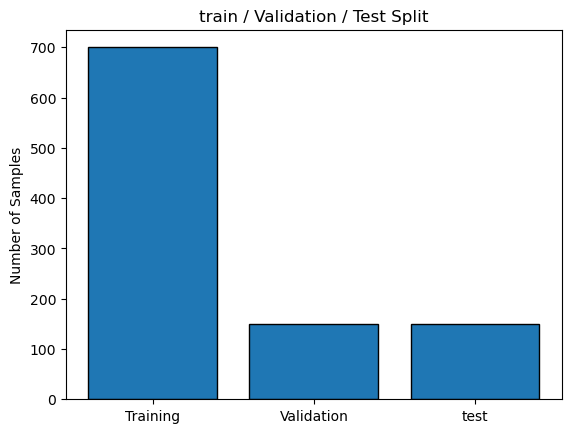

In [13]:
#visualizing the split

sizes = [len(y_train), len(y_val), len(y_test)]
labels = ["Training", "Validation", "test"]

plt.figure()
plt.bar(labels, sizes, edgecolor="black")
plt.ylabel("Number of Samples")
plt.title("train / Validation / Test Split")

os.makedirs("../outputs", exist_ok=True)
plt.savefig("../outputs/data_split_day3.png", dpi=300)
plt.show()

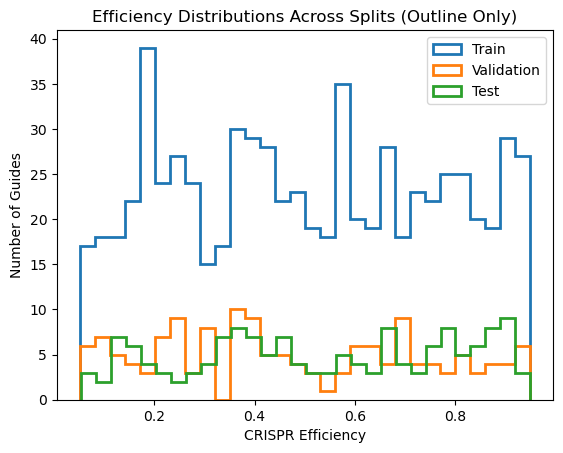

In [15]:
#visualizing the label distribution across splits

os.makedirs("../outputs", exist_ok=True)

plt.figure()

plt.hist(y_train, bins=30, histtype="step", linewidth=2, label="Train")
plt.hist(y_val, bins=30, histtype="step", linewidth=2, label="Validation")
plt.hist(y_test, bins=30, histtype="step", linewidth=2, label="Test")

plt.xlabel("CRISPR Efficiency")
plt.ylabel("Number of Guides")
plt.title("Efficiency Distributions Across Splits (Outline Only)")
plt.legend()

plt.savefig("../outputs/efficiency_distribution_across_splits_day3.png", dpi=300)
plt.show()